In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive


[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive


In [ ]:
cd My Drive

[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive


In [ ]:
INPUT_SIZE = (256, 256)
mapping = {'normal': 0, 'bacterial': 1, 'viral': 2}

Load x_train, y_train

In [ ]:
x_normal = np.load('/content/drive/My Drive/data/x_normal.npy')
y_normal = np.load('/content/drive/My Drive/data/y_normal.npy')
x_viral = np.load('/content/drive/My Drive/data/x_viral.npy')
y_viral = np.load('/content/drive/My Drive/data/y_viral.npy')
x_bacterial = np.load('/content/drive/My Drive/data/x_bacterial.npy')
y_bacterial = np.load('/content/drive/My Drive/data/y_bacterial.npy')
x_covid=np.load('/content/drive/My Drive/data/x_covid.npy')
y_covid=np.load('/content/drive/My Drive/data/y_covid.npy')

In [ ]:
import random

In [ ]:
X=[]
y=[]

nums = random.sample(range(0, 1504), 500)
for i in nums:
  X.append(x_viral[i])
  y.append(0)
nums = random.sample(range(0, 239), 239)
for i in nums:
  X.append(x_covid[i])
  y.append(1)    

In [ ]:

X=np.asarray(X)
y=np.asarray(y)

In [ ]:
for i in range(len(X)):
    img = X[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    X[i]=img

print('Shape of train images: ', X[0].shape)

Shape of train images:  (256, 256, 3)


Model for hist

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.layers import GlobalMaxPooling2D

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=32,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=64,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=128,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=256,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=3,kernel_size=(3,3),strides=1,padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Encodey_train

In [ ]:
'''from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=np.asarray(y)
y=y.reshape(-1,1)
yfunc=enc.fit(y)'''

"from sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder(handle_unknown='ignore')\ny=np.asarray(y)\ny=y.reshape(-1,1)\nyfunc=enc.fit(y)"

In [ ]:
#y_binary=enc.transform(y).toarray()

In [ ]:
#y_binary

In [ ]:
#y_test_binary=enc.transform(y_test).toarray()

In [ ]:
n=np.zeros(shape=(20,1))
v=np.zeros(shape=(20,1))
b=np.zeros(shape=(20,1))
c=np.zeros(shape=(20,1))

for i in range(20):
  v[i]=0
  c[i]=1


x_test=np.concatenate((x_viral[1100:1120],x_covid[209:219]))
y_test=np.concatenate((v,c))


Reshape x_train for giving input to conv layers

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=32)
mc = ModelCheckpoint('darkcovidnetmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X,y,batch_size=16,epochs=100,callbacks=[es,mc],validation_split=0.2)

In [ ]:
# list all data in history
print(history.history['accuracy'])

[0.9001692, 0.9458545, 0.96954316, 0.9763113, 0.98477155, 0.9966159, 0.99492383, 0.9915398, 0.9915398, 0.98815566, 0.9813875, 0.9729272, 0.9915398, 0.9864636, 0.9712352, 0.98477155, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
import pickle
with open('BinaryDCN6.pkl', 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

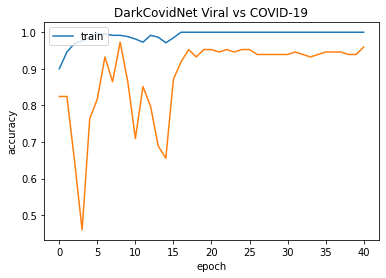

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DarkCovidNet Viral vs COVID-19')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

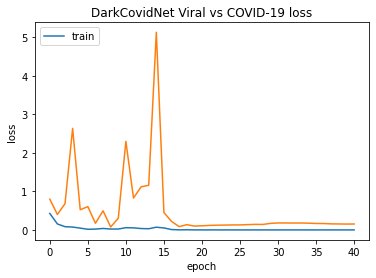

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DarkCovidNet Viral vs COVID-19 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

save model

In [ ]:
model_json = model.to_json()
with open("binarydarkcovidnet_covidvsviral.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("binarydarkcovidnet_covidvsviral.h5")

load model

In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('binarydarkcovidnet_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("darkcovidnet.h5")

In [ ]:
testacc=[]
sens=[]
spec=[]

load x_test, y_test

In [ ]:


v=np.zeros(shape=(40,1))
c=np.zeros(shape=(40,1))

for i in range(40):
  v[i]=0
  c[i]=1


x_test=np.concatenate((x_viral[1300:1340],x_covid[90:130]))
y_test=np.concatenate((v,c))


In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
_, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('accuracy: ',test_acc,)
print('loss:',_)

accuracy:  0.4
loss: 2.3617337226867674


In [ ]:
y_pred=model.predict(x_test)


In [ ]:
sample_labels = []
for i in y_pred:
  if i>0.5:
    sample_labels.append(1)
  else :
    sample_labels.append(0) 

In [ ]:
import sklearn
test_acc=sklearn.metrics.accuracy_score(y_test, sample_labels)

In [ ]:
test_acc

0.7625

-----------------------------------
TP :  23
TN :  38
FP :  2
FN :  17
sensitivity :  0.575
specificity :  0.95


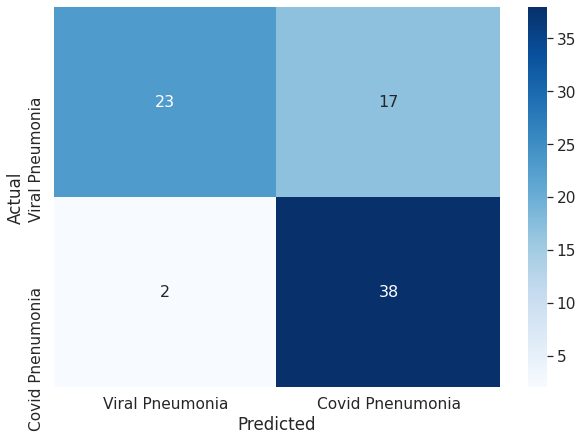

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,sample_labels)
import seaborn as sns
df_cm = pd.DataFrame(cm, columns=['Viral Pneumonia','Covid Pnenumonia'], index =['Viral Pneumonia','Covid Pnenumonia'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')




fp=cm[1][0]
fn=cm[0][1]
tp=cm[0][0]
tn=cm[1][1]
print("-----------------------------------")
print("TP : ",tp)
print("TN : ",tn)
print("FP : ",fp)
print("FN : ",fn)
print("sensitivity : ",tp/(float)((tp+fn)))
print("specificity : ",tn/(float)((tn+fp)))
sn=tp/(float)((tp+fn))
sp=tn/(float)((tn+fp))


In [ ]:
testacc.append(test_acc)
sens.append(sn)
spec.append(sp)

In [ ]:
print(len(testacc))
print(testacc)
print(sens)
print(spec)

20
[0.95, 0.7875, 0.85, 0.875, 0.85, 0.85, 0.925, 0.8875, 0.875, 0.7875, 0.8625, 0.8375, 0.7625, 0.7875, 0.8375, 0.7625, 0.7625, 0.7625, 0.7625, 0.7625]
[0.9, 0.575, 0.7, 0.75, 0.7, 0.7, 0.85, 0.775, 0.75, 0.575, 0.725, 0.725, 0.575, 0.575, 0.725, 0.575, 0.575, 0.575, 0.575, 0.575]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.95, 0.95, 1.0, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


In [ ]:
dic={'test_acc':testacc, 'sens':sens,'spec':spec}
import pickle
with open('Boxplot_virvscovid_darkcovidnet.pkl', 'wb') as f:
  pickle.dump(dic, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
img=np.expand_dims(img,axis=(0,3))

In [ ]:
img.shape

In [ ]:
pred1=loaded_model.predict(img)
pred1_label=enc.inverse_transform(pred1)
for key in mapping.keys():
  if(mapping[key]==pred1_label[0][0]):
    print(key)

Predicting Test samples and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

